In [48]:
from __future__ import annotations
from enum import IntEnum
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from transforms.arg_map import ArgMap, ColumnBase, BOOL_MAP

In [49]:
TRAIN = pd.read_csv("data/train.csv")
TEST = pd.read_csv("data/test.csv")

display(TRAIN)
display(TEST)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 雑にpairplotしてみる
相関があるやるがあればパット見れるのでとりあえず描画 -> なにもわからなかった

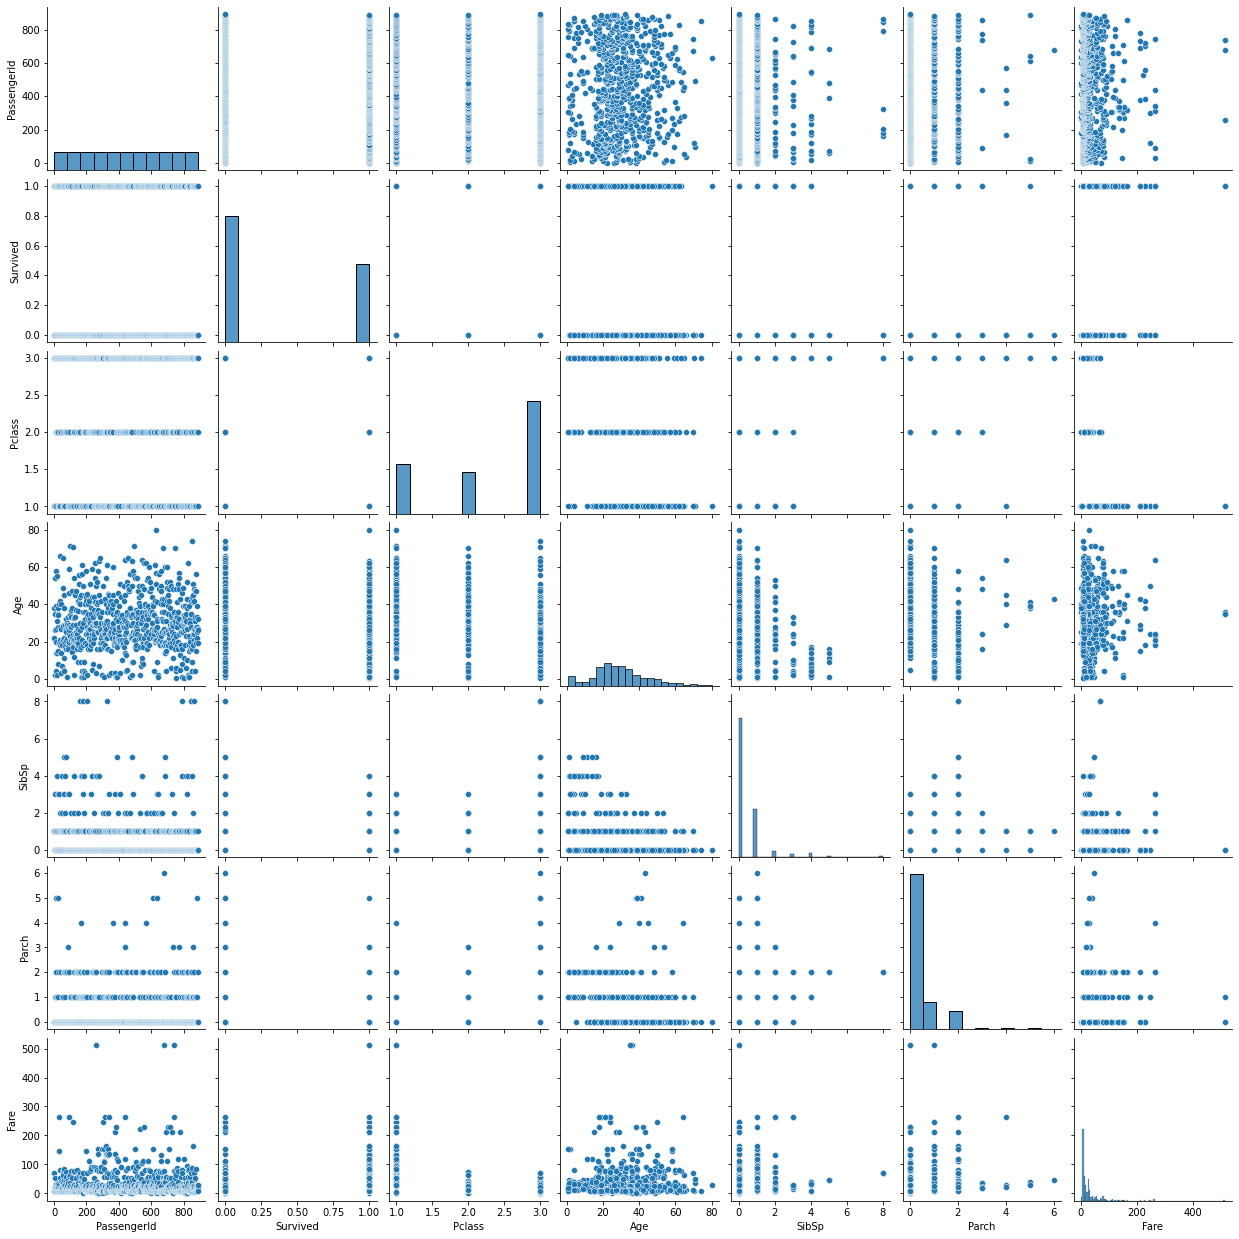

In [50]:
plt.close()
sns.pairplot(TRAIN)
plt.show()

## NaNのあるカラム
NaNのある行をdropするなり、NaNも許容する特徴量を作るなりしよう

In [51]:
TRAIN.isna().any(axis="index")

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## カテゴリカルな変数で生存が割れそうか見てみる

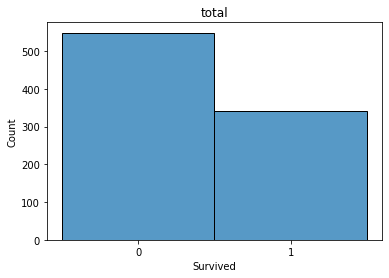

In [52]:
def plot_survived(df: pd.DataFrame, title: str = None) -> None:
    """生存分布の描画

    Args:
        df (pd.DataFrame): [description]
        title (str, optional): [description]. Defaults to None.
    """
    plt.close()
    sns.histplot(df.Survived.sort_values().astype(str))
    plt.title(title)
    plt.show()

plot_survived(TRAIN, "total")

### 性別で割れそう
男性のほうが生存してない

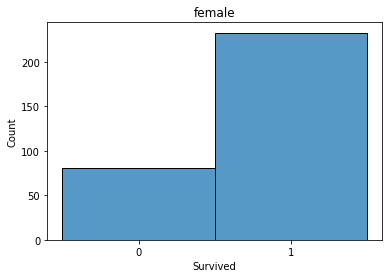

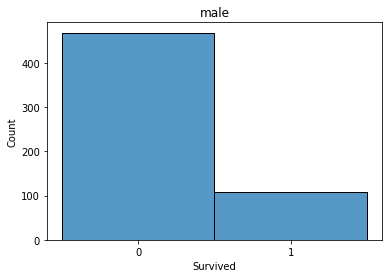

""


In [ ]:
sex_map = ColumnBase([
    ArgMap("female", 0),
    ArgMap("male", 1),
])
TRAIN.groupby("Sex").apply(lambda x: plot_survived(x, x.Sex.iloc[0]))

### チケット階級だとどうだろう
上級が生き残りやすいとかありそう <- そうっぽい

1st: 助かってるほうが多い、2nd: どっこいどっこ、3rd: 助かっていないほうが多い


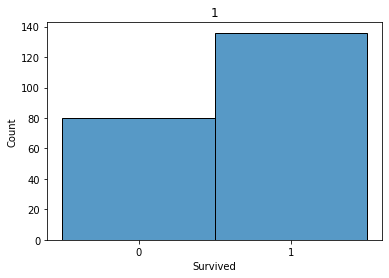

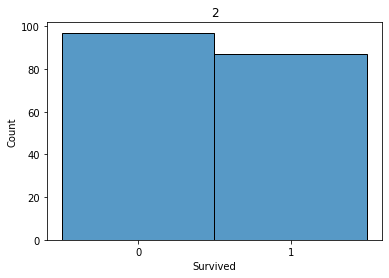

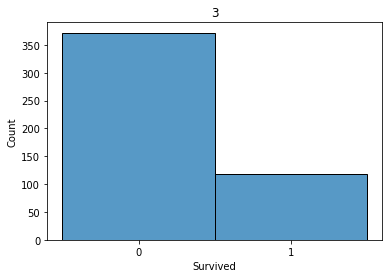

""


In [ ]:
TRAIN.groupby("Pclass").apply(lambda x: plot_survived(x, x.Pclass.iloc[0]))

### 年齢
愚直にscatter取っ手もわからんから、年代で分けてplot_survivedｗするのがよさげ

~~20台未満か否かで変わりそう~~ 10歳未満が助かりやすい -> そういうカラムを追加する感じか

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

'count NA 177'

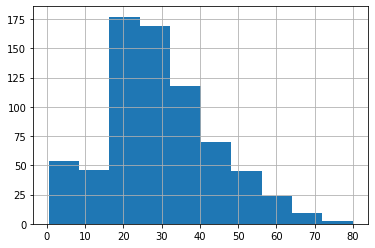

In [ ]:
TRAIN.Age.hist()
display(TRAIN.Age.describe())
display(f"count NA {len(TRAIN.Age[TRAIN.Age.isna()])}")

class AgeClass(IntEnum):
    NA = 0
    UNDER10 = 10
    BETWEEN10AND20 = 11
    BETWEEN20AND40 = 21
    OVER40 = 41

    @classmethod
    def get_age_class(cls, age: float) -> AgeClass:
        if not isinstance(age, float) or age < 0:
            raise ValueError(f"invalid age: age={age}")

        if math.isnan(age):
            return cls.NA
        elif 0 <= age < 10:
            return cls.UNDER10
        elif 10 <= age < 20:
            return cls.BETWEEN10AND20
        elif 20 <= age < 40:
            return cls.BETWEEN20AND40
        elif 40 <= age:
            return cls.OVER40
        else:
            raise ValueError(f"unknown age: age={age}")

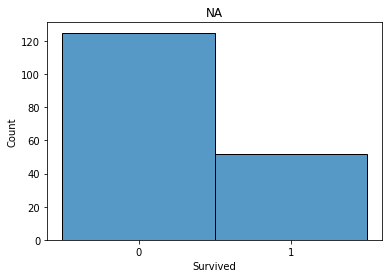

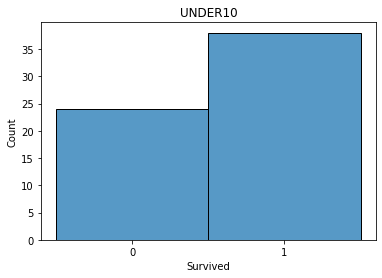

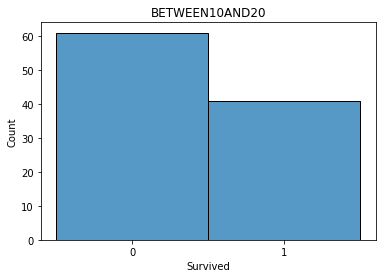

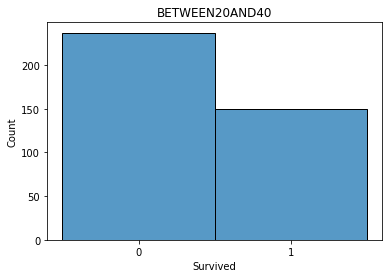

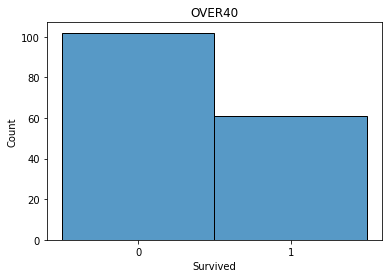

""


In [ ]:
(
    TRAIN
    # 年齢区分を追加
    .assign(
        AgeClass=TRAIN.Age.apply(lambda x: AgeClass.get_age_class(x))
    )

    # 年齢区分ごとに生存状況を描画
    .groupby("AgeClass")
    .apply(lambda x: plot_survived(x, AgeClass(x.AgeClass.iloc[0]).name))
)

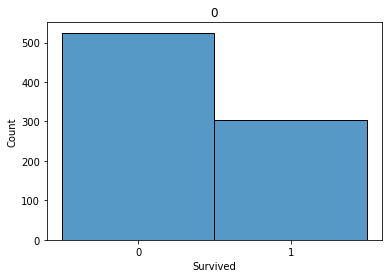

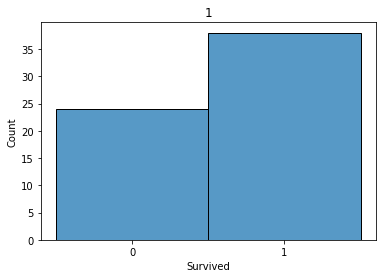

""


In [ ]:
from transforms.column_under_10_years_old import column_under_10_years_old


display(
    TRAIN
    # 年齢区分を追加
    .assign(
        Under10YearsOld=column_under_10_years_old(TRAIN)
    )
    # 年齢区分ごとに生存状況を描画
    .groupby("Under10YearsOld")
    .apply(lambda x: plot_survived(x, x.Under10YearsOld.iloc[0]))
)


## 一緒に乗っている兄弟・配偶者の数
一人あるいは3人以上で来ている人は助からない...？

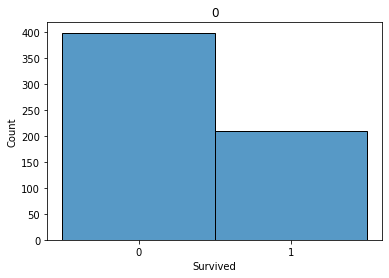

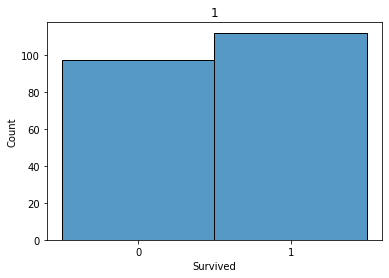

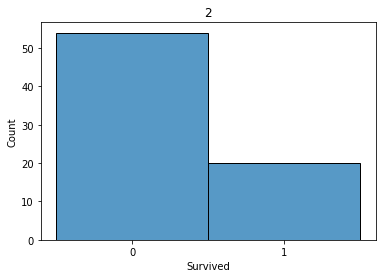

""


In [ ]:
class Companions(IntEnum):
    SINGLE = 0
    PAIR = 1
    GROUP = 2

    @classmethod
    def get_companions(cls, sibsp: int) -> Companions:
        if sibsp == 0:
            return cls.SINGLE
        elif sibsp == 1:
            return cls.PAIR
        elif sibsp >= 2:
            return cls.GROUP
        else:
            raise ValueError(f"invalid sibsp {sibsp}")

(
    TRAIN
    .assign(
        Companions=TRAIN.SibSp.apply(Companions.get_companions)
    )
    .groupby("Companions")
    .apply(lambda x: plot_survived(x, title=x.Companions.iloc[0]))
)

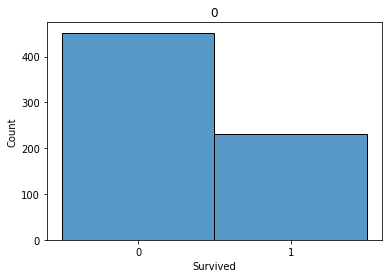

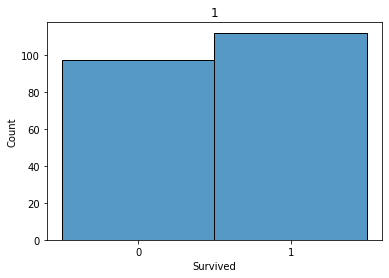

""


In [ ]:
from transforms.column_is_pair import column_is_pair
(
    TRAIN
    .assign(
        IsPair=column_is_pair(TRAIN)
    )
    .groupby("IsPair")
    .apply(lambda x: plot_survived(x, title=x.IsPair.iloc[0]))
)

## 同行する親or子供の数 Parch
0だと助からないとかありそう、それ以外は微妙

カラムとしてはそのまま入れる

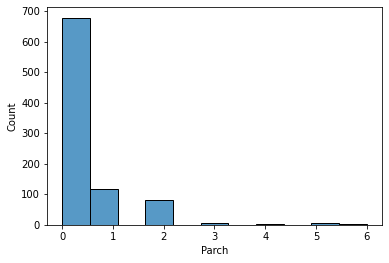

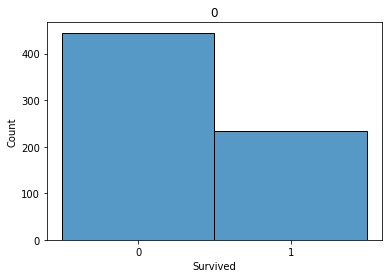

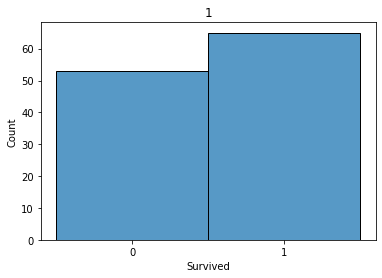

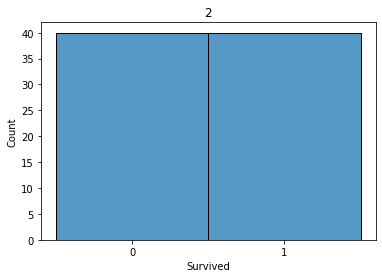

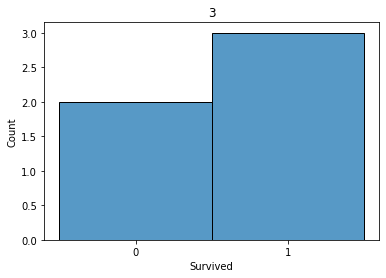

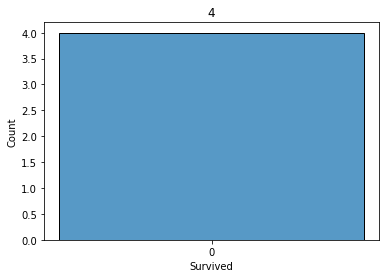

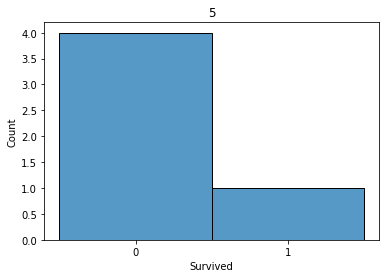

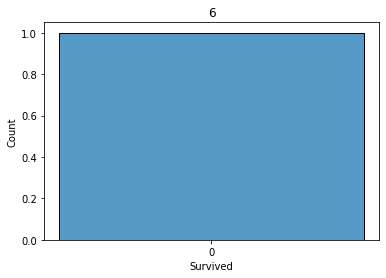

""


In [ ]:
plt.close()
sns.histplot(TRAIN.Parch)
plt.show()

TRAIN.groupby("Parch").apply(lambda x: plot_survived(x, title=x.Parch.iloc[0]))

## どの港から乗ったかで分かれるか
あまりストーリーが思いつかないが、Profilingを見る限り、`C: Cherbourg`以外が助からない傾向があるっぽいので性能上がりそう

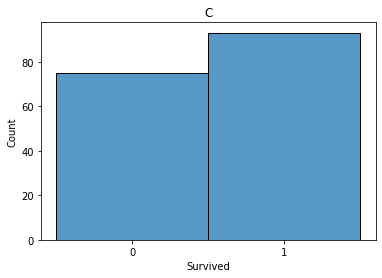

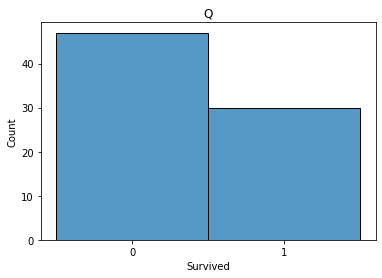

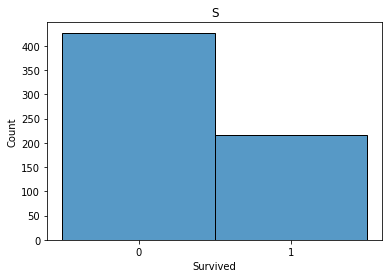

""


In [54]:
TRAIN.groupby("Embarked").apply(lambda x: plot_survived(x, x.Embarked.iloc[0]))